In [87]:
import pandas as pd
import random
import numpy as np
from pandas import read_csv
from matplotlib import pyplot

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
from sklearn.metrics import mean_squared_error

In [21]:
class MoneyBox:
    def __init__(self, capacity):
        self.capacity = capacity
        self.start = 0

    def can_add(self, v):
        # True, if you can add v coins, False otherwise
        return self.start + v <= self.capacity
       
    def add(self, v):
        # put v coins to moneybox
        if self.can_add(v):
            self.start += v
        else:
            print("Money box is full")

In [133]:
# Implement SQL query to select employees first names and last names(employee and managers) who worked from 
# 2020-01-01 to 2020-01-31. Note that dt_work_from and dt_work_to are date-time fields.
SELECT employee.first_name, employee.last_name, manager.first_name, manager.last_name FROM employee FULL OUTER 
JOIN table_1 ON employee.id_employee = table_1.id_employee FULL OUTER JOIN manager ON 
table_1.id_manager = manager.id_manager WHERE table_1.dt_work_from = '2020-01-01' AND 
table_1.dt_work_to = '2020-01-31'

In [3]:
# Input:
df = pd.DataFrame({'days': [1, 1, 2, 2, 1, 3, 4],
                   'values': [10, 10, 5, 3, -2, 4, 20]})

# Your algorithm: Aggregate by days and get mean, median, max, and min values for 'values'.

df = df.groupby('days').agg({'values': [np.mean, np.median, np.max, np.min]})
df = df.rename(columns={'mean': 'mean_values', 'median' : 'median_values', 'amax' : 'max_values',
                       'amin' : 'min_values'})
df.head()

# Output:
# pd.DataFrame({'days': [1, 2, 3, 4],
#               'mean_values': [6, 4, 4, 20],
#               'median_values': [10, 4, 4, 20],
#               'max_values': [10, 5, 4, 20],
#               'min_values': [-2, 3, 4, 20]})


values                                    
     mean_values median_values max_values min_values
days                                                
1              6            10         10         -2
2              4             4          5          3
3              4             4          4          4
4             20            20         20         20

In [4]:
# Input:
df = pd.DataFrame({'employee': [1001, 1002, 1004, 1001, 1001, 1002, 1004, 1005, 1005],
                    'pos': [2, 2, 2, 2, 2, 2, 2, 2, 2],
                    'amount': [125, 542, 2345, 892, 100, 1234, 657, 34, 35]})

# Your algorithm: Select the top 2 employees with the max difference between the lowest amount and the highest 
# amount for each employee.

df = df.sort_values(by='employee')
df['amount'] = df['amount'].diff().abs()
df = df.sort_values(by='amount', ascending=False)
df = df.drop_duplicates(subset='employee', keep='first', inplace=False)
df.head(2)
   
#  Output:
# pd.DataFrame({'employee': [1004, 1001],
#               'pos': [2, 2],
#               'amount_diff': [1688, 792]})


,employee,pos,amount
6,1004,2,1688.0
4,1001,2,792.0


In [5]:
# ML.
# Suppose you have data about the daily number of visitors of some restaurant. See test_restaurant.csv. Research the provided dataset, and create a forecast model for 1 day forward.
# Expected output: Create a notebook with all stages of the analysis, key metrics, output and plots.
# If you applied a few methods, provide some details, and explain why you rejected them.
# Imagine like you have this task as a real one. Create a new project on github, and demonstrate the development process.
# Do not spend a lot of time on this task. Demonstrate one or few zero approaches. 


In [13]:
pwd

'/Users/clairechour'

In [43]:
# Load dataset
data = pd.read_csv('test_restaurant.csv')   
df = pd.DataFrame(data, columns= ['date','num_visitors'])
df.head(20)

,date,num_visitors
0,2000-01-01,49.128490
1,2000-01-02,50.288060
2,2000-01-03,53.549213
3,2000-01-04,45.453240
4,2000-01-05,49.469402
5,2000-01-06,48.554940
6,2000-01-07,47.056410
7,2000-01-08,44.184040
8,2000-01-09,45.621517
9,2000-01-10,53.566944


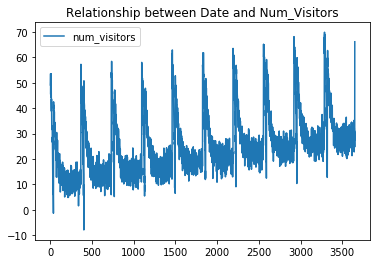

In [44]:
df.plot(title='Relationship between Date and Num_Visitors')

In [62]:
# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

Test MSE: 24.074


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Text(0.5, 1.0, 'Predictions vs Actual Daily num_visitors Dataset Line Plot')

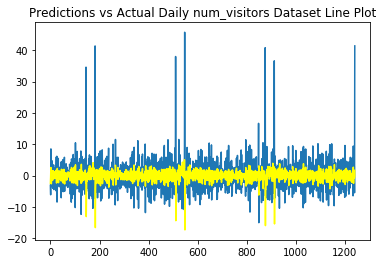

In [69]:
# split dataset
X = difference(df['num_visitors'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='yellow')
pyplot.title('Predictions vs Actual Daily num_visitors Dataset Line Plot')

In [77]:
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)
# save model to file
model_fit.save('ar_model.pkl')
# save the differenced dataset
np.save('ar_data.npy', X)
# save the last ob
np.save('ar_obs.npy', [df.values[-1]])

In [86]:
# load model
model = ARResults.load('ar_model.pkl')
data = np.load('ar_data.npy')
last_ob = np.load('ar_obs.npy', allow_pickle=True)
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0]
print('Prediction: %f' % yhat)

Prediction: -15.418986


In [ ]:
# The example below shows how the next time period can be predicted.

# The model, training data, and last observation are loaded from file.

# The period is specified to the predict() function as the next time index after the end of the training data set. This index may be stored directly in a file instead of storing the entire training data, which may be an efficiency.

# The prediction is made, which is in the context of the differenced dataset. To turn the prediction back into the original units, it must be added to the last known observation.